In [1]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19-04/11/19
#CNN para EEG de Habla Imaginada con 2 capas
#32@3x7 y 64@3x7

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv("Submuestreo02.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(225, 3072)
(225,)
225


In [4]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [5]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 12, 256, 1))
print(x.shape)

(225, 12, 256, 1)


In [6]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 7), activation='relu', input_shape=(12, 256, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 7), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 250, 32)       704       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 125, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 119, 64)        43072     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 59, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3776)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                241728    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 168 samples, validate on 57 samples
Epoch 1/20
168/168 [==============================] - 5s 27ms/sample - loss: 1.9915 - acc: 0.1071 - val_loss: 1.8082 - val_acc: 0.0702
Epoch 2/20
168/168 [==============================] - 0s 629us/sample - loss: 1.7714 - acc: 0.2560 - val_loss: 1.8258 - val_acc: 0.1579
Epoch 3/20
168/168 [==============================] - 0s 699us/sample - loss: 1.7656 - acc: 0.2024 - val_loss: 1.8072 - val_acc: 0.1228
Epoch 4/20
168/168 [==============================] - 0s 622us/sample - loss: 1.7271 - acc: 0.2619 - val_loss: 1.8142 - val_acc: 0.1404
Epoch 5/20
168/168 [==============================] - 0s 668us/sample - loss: 1.6920 - acc: 0.3155 - val_loss: 1.8259 - val_acc: 0.1754
Epoch 6/20
168/168 [==============================] - 0s 685us/sample - loss: 1.6520 - acc: 0.3512 - val_loss: 1.8090 - val_acc: 0.1930
Epoch 7/20
168/168 [==============================] - 0s 724us/sample - loss: 1.5902 - acc: 0.3810 - val_loss: 1.8310 - val_acc: 0.1754
Epoc

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

57/57 [==============================] - 0s 5ms/sample - loss: 2.7652 - acc: 0.1930
Test loss: 2.7651728789011636
Test accuracy: 0.19298245


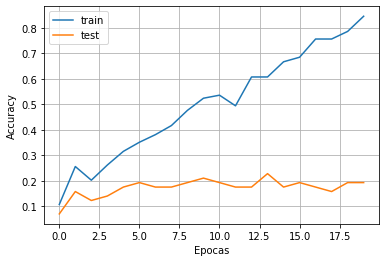

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

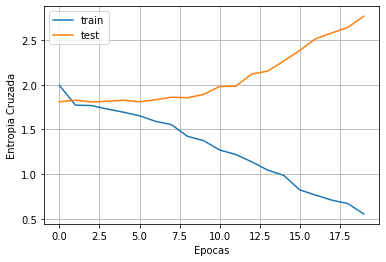

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()